<img src="vua.png">

# Analiza relevantnosti atributa (WoE + IV)

Analiza relevantnosti atributa temeljni je postupak prilikom provođenja analiza za potrebe kreiranja
prediktivnh modela. Općenito, uzorci mogu imati:
- <b>dva</b> modeliteta ciljne varijable
- <b>više</b> modeliteta ciljne varijable

Kod uzoraka s <b>dva</b> modaliteta ciljne varijable, za procjenu prediktivne snage svakog atributa iz uzorka na ciljnu varijablu se preporučuje izračunavanje mjera <b>Weight of Evidence</b> i <b>Information Value</b>.

## Weight of Evidence (WoE)
Weight of Evidence je mjera kojom prikazujemo povezanost pojedine kategorije unutar jedne varijable s ciljnom varijablom. Računa se formulom:

$$WoE = \ln\frac{Distribucija\space Dobrih}{Distribucija\space Loših}$$

<div class="alert alert-danger">
<b>V A Ž N O  !</b><br>
<br>
WoE možemo koristiti samo na <b>kategoričkim varijablama</b>.<br>Prije računanja WoE za kontinuirane varijable potrebno ih je diskretizirati.
</div>

## Information Value (IV)
Information value je mjera relevantnosti atributa (varijable). Služi za odabir atributa koje ćemo uključiti u izradu prediktivnog modela i njihovo rangiranje po važnosti (prediktivnoj snazi). Računamo je formulom:

$$IV = \sum (Distribucija\space Dobrih - Distribucija\space Loših)*WoE$$

za sve <b>kategoričke</b> vrijednosti svake varijable.

Izračunate vrijednosti za sve varijable sortiramo silazno prema *IV* te na kraju u prediktivni model uključujemo samo najbolje.<br>
<br>
U sljedećoj tablici možete vidjeti usporedbu *IV* vrijednosti s prediktivnošću
varijable.

IV|Prediktivnost varijable
------------|----------------
< 0.02|Varijabla nije korisna
0.02-0.1|Slaba prediktivnost
0.1-0.3|Srednja prediktivnost
0.3-0.5|Jaka prediktivnost
> 0.5|Super prediktivnost

## Primjer izračunavanja WoE i IV

U sljedećem primjeru je izračunavanje mjere relevantnosti atributa IV podijeljeno u 6 koraka:
- Učitavanje podataka iz CSV (Comma Separated Values) datoteke
- Definicija ciljne varijable
- Pretvaranje odabrane kontinuirane varijable u kategoričku
- Računanje WoE i IV za svaku kategoriju odabrane varijable
- Računanje IV za cijelu varijablu
- Grafički prikaz i interpretacija rezultata

Koristit ćemo set podataka koji sadrži 150 redaka u kojem svaki redak predstavlja podatke o jednom cvijetu. Svaki cvijet pripada jednoj od tri kategorije:

<img src="iris3.png">

Za svaki cvijet imamo na raspolaganju četiri varijable (features):
- sepal length
- sepal width
- petal length
- petal width

Cilj vježbe je odgovoriti na sljedeće pitanje:
- Na temelju koje od četiri varijable možemo najlakše prepoznati cvijet **Iris-setosa**?

Drugim riječima: tražimo varijablu koja je najrelevantnija za prepoznavanje cvijeta **Iris-setosa**.


### Učitavanje podataka iz CSV (Comma Separated Values) datoteke

Učitajmo podatke iz datoteke "iris.csv" i pogledajmo prva tri retka za svaku od vrsta cvjetova.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib as plt

path='iris.csv'
# ako želite analizirati neku drugu datoteku, promijenite naziv datoteke (unutar navodnika) u gornjem retku

df = pd.read_csv(path, sep=';')
df.groupby('iris').head(3)

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica


### Definicija ciljne varijable
Budući da želimo prepoznati vrstu **Iris-setosa** kreirat ćemo ciljnu varijablu koja ima vrijednost "DA" u svakom retku koji se odnosi na **Iris-setosa** i vrijednost "NE" u svim ostalim retcima.

In [2]:
df['ciljna'] = 'NE'
df.loc[df.iris=='Iris-setosa', 'ciljna'] = "DA"
# Ako želite neku drugu ciljnu varijablu, zamijenite naziv 'Iris-setosa' u retku iznad 
df.groupby('iris').head(3)

,sepallength,sepalwidth,petallength,petalwidth,iris,ciljna
0,5.1,3.5,1.4,0.2,Iris-setosa,DA
1,4.9,3.0,1.4,0.2,Iris-setosa,DA
2,4.7,3.2,1.3,0.2,Iris-setosa,DA
50,7.0,3.2,4.7,1.4,Iris-versicolor,NE
51,6.4,3.2,4.5,1.5,Iris-versicolor,NE
52,6.9,3.1,4.9,1.5,Iris-versicolor,NE
100,6.3,3.3,6.0,2.5,Iris-virginica,NE
101,5.8,2.7,5.1,1.9,Iris-virginica,NE
102,7.1,3.0,5.9,2.1,Iris-virginica,NE


### Pretvaranje odabrane kontinuirane varijable u kategoričku
Izračunat ćemo naprije relevantnost varijable **sepalwidth**. Budući da je varijabla kontinuirana (može poprimiti bilo koju vrijednost u rasponu između minimalne i maksimalne širine lista) podijelit ćemo je, za primjer, na 3 kategorije.

In [3]:
df['kategorija'] = pd.qcut(df.sepalwidth,3)
df.groupby('iris').head(3)

,sepallength,sepalwidth,petallength,petalwidth,iris,ciljna,kategorija
0,5.1,3.5,1.4,0.2,Iris-setosa,DA,"(3.2, 4.4]"
1,4.9,3.0,1.4,0.2,Iris-setosa,DA,"(2.9, 3.2]"
2,4.7,3.2,1.3,0.2,Iris-setosa,DA,"(2.9, 3.2]"
50,7.0,3.2,4.7,1.4,Iris-versicolor,NE,"(2.9, 3.2]"
51,6.4,3.2,4.5,1.5,Iris-versicolor,NE,"(2.9, 3.2]"
52,6.9,3.1,4.9,1.5,Iris-versicolor,NE,"(2.9, 3.2]"
100,6.3,3.3,6.0,2.5,Iris-virginica,NE,"(3.2, 4.4]"
101,5.8,2.7,5.1,1.9,Iris-virginica,NE,"(1.999, 2.9]"
102,7.1,3.0,5.9,2.1,Iris-virginica,NE,"(2.9, 3.2]"


### Računanje WoE i IV za svaku kategoriju odabrane varijable

Prvo definiramo dvije nove varijable *a* i *b* koje će čuvati serije podataka s vrjednostima varijable *katedorija* i *ciljna*. Mogli smo koristiti i pune nazive ali ovako će nam biti jednostavnije.

In [4]:
a = df.kategorija
b = df.ciljna
print(a.head())
print(b.head())

0    (3.2, 4.4]
1    (2.9, 3.2]
2    (2.9, 3.2]
3    (2.9, 3.2]
4    (3.2, 4.4]
Name: kategorija, dtype: category
Categories (3, interval[float64]): [(1.999, 2.9] < (2.9, 3.2] < (3.2, 4.4]]
0    DA
1    DA
2    DA
3    DA
4    DA
Name: ciljna, dtype: object


Zatim korištenjem metode *crosstab* radimo pivot tablicu od ove dvioje varijable.

In [5]:
IV=pd.crosstab(a,b)
IV

ciljna,DA,NE
kategorija,,
"(1.999, 2.9]",2,55
"(2.9, 3.2]",16,35
"(3.2, 4.4]",32,10


Sada kad smo dobili broj pojavljivanja po kategorijama trebaju nam omjeri, odnosno za pojedinu kategoriju broj vrijednosti koje su bile primjerice u stupcu *DA* podjelimo s ukupnim brojem svih vrijednosti u tom stupcu.

In [6]:
IV['DA']=IV['DA']/IV['DA'].sum()
IV['NE']=IV['NE']/IV['NE'].sum()
IV

ciljna,DA,NE
kategorija,,
"(1.999, 2.9]",0.04,0.55
"(2.9, 3.2]",0.32,0.35
"(3.2, 4.4]",0.64,0.10


Isti rezultat smo mogli dobiti i korištenjem *lambda* funkcije i na rezultat metode *crosstab* odmah primjeniti formulu.

In [7]:
IV=pd.crosstab(a,b).apply(lambda c: c/c.sum(), axis=0)
IV

ciljna,DA,NE
kategorija,,
"(1.999, 2.9]",0.04,0.55
"(2.9, 3.2]",0.32,0.35
"(3.2, 4.4]",0.64,0.10


Sada kada imamo omjere po vrijednostima koristimo gornju formulu za izračun WoE (Weight of Evidence) za pojedinu kategoriju.

In [8]:
IV['WoE'] = np.log(IV['DA']/IV['NE'])
IV

ciljna,DA,NE,WoE
kategorija,,,
"(1.999, 2.9]",0.04,0.55,-2.621039
"(2.9, 3.2]",0.32,0.35,-0.089612
"(3.2, 4.4]",0.64,0.10,1.856298


Te jednako tako računamo IV (Information Value) po kategorijama. Ta vrijednost po kategorijama nam ne znači ništa već je trebamo sumirati da bi dobili važnost varijable.

In [9]:
IV['IV'] = (IV['DA']-IV['NE'])* np.log(IV['DA']/IV['NE'])
IV


ciljna,DA,NE,WoE,IV
kategorija,,,,
"(1.999, 2.9]",0.04,0.55,-2.621039,1.336730
"(2.9, 3.2]",0.32,0.35,-0.089612,0.002688
"(3.2, 4.4]",0.64,0.10,1.856298,1.002401


Možemo i pospremiti prethodnu tablicu u datoteku.

In [10]:
IV.to_csv('Test.csv')
IV

ciljna,DA,NE,WoE,IV
kategorija,,,,
"(1.999, 2.9]",0.04,0.55,-2.621039,1.336730
"(2.9, 3.2]",0.32,0.35,-0.089612,0.002688
"(3.2, 4.4]",0.64,0.10,1.856298,1.002401


### Računanje IV za cijelu varijablu
Izračunajmo ukupnu vrijednost IV za promatranu varijablu zbrajanjem vrijednosti IV za sve kategorije

In [11]:
IV['IV'].sum()

2.3418190798555445

### Grafički prikaz i interpretacija rezultata
Vrijednosti WoE manje od nule pokazuju vjerojatniju pripadnost kategoriji "NE" ciljne varijable, a vrijednosti veće od nule pokazuju vjerojatniju pripadnost kategoriji "DA". Uočite da pripadnost ili nepripadnost pojedinoj kategoriji ciljne varijable ovisi o kategoriji ciljne varijable (DA ili NE) koju smo stavili u brojnik odnosno nazivnik formule za izračunavanje WoE.

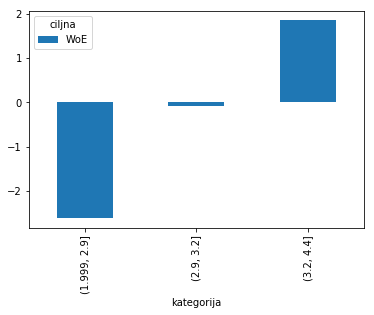

In [12]:
%matplotlib inline

import matplotlib.pyplot as p
IV[['WoE']].plot(kind='bar')
p.show()

Na primjeru varijable **sepalwidth** možemo zaključiti da listovi širine od 2-2,9 ne spadaju u kategoriju Iris-setosa, listovi širine 2,9-3,2 imaju neodređenu pripadnost, dok očekivanu pripadnost ovom tipu irisa imaju listovi širine 3,2-4,4.

<br>
<div class="alert alert-info">
<b>Zadatak 1</b>
</div>

### Upute
1. Napravite funkciju koja vam za poslani DataFrame, vraća Information Value.
2. U pozivu funkcije osim DataFramea morate omogućiti upis imena stupaca za ulazne varijable (features) i ciljnu varijablu (target). Ako imena stupaca nisu navedena u pozivu funkcije onda treba izračunati IV za sve varijable u DataFrameu.
3. Funkcija mora vratiti DataFrame s popisom ulaznih varijabli, silazno sortiranih po vrijednosti IV.
4. Povežite te vrijednosti s tablicom prediktivnosti i dodajte stupac s tekstualnim opisom prediktivnosti varijable.

> Napomena: Izračunajte IV <b>samo za kategoričke varijable</b> (vrstu varijable možete otkriti metodom *dtype*).

Naziv stupca | Opis
------|------
dob|Starost korisnika
nkid|Broj djece
dep|Broj drugih uzdržavanih osoba
phon|Ima kućni telefon 1=da, 0=ne
sinc|Dohodak supružnika
aes|Radni status (V = državni službenik, W = domaćica, M = vojnik, P = privatni sektor, B = javni sektor, R = umirovljenik, E = samozaposlen, T = student, U = nezaposlen, N = ostalo, Z  = bez odgovora)
dainc|Prihodi
res|Stambeni status (O = vlasnik, F = podstanar, P = sa roditeljima, N = drugo, Z = bez odgovora)
dhval|Vrijednost nekretnine (Ako je 0 nema nekretninu)
dmort|Vrijednost hipoteke (Ako je 0 nema nekretninu)
doutm|Rashodi na hipoteku ili iznajmljivanje
doutl|Rashodi na kredite
douthp|Rashodi na otplatu
doutcc|Rashodi na kreditnim karticama
Bad|**Ciljna varijabla**: indikator dobar/loš (1 = Loš, 0 = Dobar)

In [13]:
# U nastavku upišite kôd funkcije
# Komentirajte pojedine korake uz kôd ili korištenjem "Markdown" ćelija)

import pandas as pd



In [14]:
# Ovdje napišite kôd koji poziva funkciju,
# ispisuje rezultat za kategoričke varijable sortirane po IV

df = pd.read_csv('CS.csv', sep=';')
df.head()


,DOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
0,19,4,0,1,0,R,0,O,14464,4,0,0,0,0,0
1,41,2,0,1,0,P,36000,O,0,0,280,664,0,80,0
2,66,0,0,1,0,N,30000,N,0,0,0,0,0,0,0
3,51,2,0,1,0,P,464,O,24928,8464,584,320,0,60,0
4,65,0,0,1,0,P,15000,P,0,0,0,0,0,0,0


Rezultat bi trebao izgledati ovako:

Nezavisna varijabla|IV|Prediktivnost
------|-----|---
AES|0.1764|Srednja prediktivnost
RES|0.0589|Srednja prediktivnost
NKID|0.0188|Slaba prediktivnost
PHON|0.0091|Varijabla nije korisna
DEP|0.0039|Varijabla nije korisna

Snimite DataFrame s izračunatim relevantnostima atributa u datoteku pod nazivom "WoE_IV.csv"

In [15]:
# Ovdje napišite kod za snimanje datoteke


U nastavku grafički prikažite WoE **za sve varijable** (prema predlošku u stupcu NKID u sljedećem primjeru):

Nezavisna varijabla|IV|Prediktivnost
------|-----|---|---
AES|0.1764|Srednja prediktivnost|
RES|0.0589|Srednja prediktivnost|
NKID|0.0188|Slaba prediktivnost|<img src="sample.png",width=200, height=100>
PHON|0.0091|Varijabla nije korisna|
DEP|0.0039|Varijabla nije korisna|

In [16]:
# ovdje napišite kod koji grafički prikazuje WoE za sve varijable


<br>
<div class="alert alert-info">
<b>Kraj prvog zadatka</b>
</div>

<br>
<div class="alert alert-info">
<b>Zadatak 2</b>
</div>

### Upute
1. Proširite prethodni zadatak tako da za kontinuirane varijable napravite diskretizaciju te vratite rezultatate i za njih.

<br>
<div class="alert alert-info">
<b>Kraj drugog zadatka</b>
</div>